#Imporing Liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Import Submission data as labels


In [ ]:
submission=pd.read_csv('/content/sample_submission.csv')
target_mapping={True:1,False:0}
submission["Transported"] = submission["Transported"].map(target_mapping)
y_test=submission['Transported']

In [ ]:
y_test.value_counts()

0    4272
1       5
Name: Transported, dtype: int64

#Import training and testing data

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# taking a peek on the data

In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.drop(columns='Name',inplace=True)

#Counting Nulls

In [ ]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

#Replacing null values with mean and mode

In [ ]:
train['Age']=train['Age'].fillna(train['Age'].mean())
train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode()[0])
train['Destination']=train['Destination'].fillna(train['Destination'].mode()[0])
train['VIP']=train['VIP'].fillna(train['VIP'].mode()[0])
train['RoomService']=train['RoomService'].fillna(train['RoomService'].mode()[0])
train['FoodCourt']=train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa']=train['Spa'].fillna(train['Spa'].mean())
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())

In [ ]:
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

#Split Cabin name by delimiter '/' and then remove 'Cabin' column

In [ ]:
train['Cabin_A']=train['Cabin'].str.split('/').str[0]
train['Cabin_B']=train['Cabin'].str.split('/').str[1]
train['Cabin_C']=train['Cabin'].str.split('/').str[2]

In [ ]:
train.drop(columns='Cabin',inplace=True)


#Taking a peek on data again

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_A,Cabin_B,Cabin_C
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [ ]:
train.dtypes.to_frame()

,0
PassengerId,object
HomePlanet,object
CryoSleep,bool
Destination,object
Age,float64
VIP,bool
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64


In [ ]:
train['HomePlanet'].value_counts().to_frame()

,HomePlanet
Earth,4803
Europa,2131
Mars,1759


In [ ]:
train['CryoSleep'].value_counts().to_frame()

,CryoSleep
False,5656
True,3037


In [ ]:
train['Destination'].value_counts().to_frame()

,Destination
TRAPPIST-1e,6097
55 Cancri e,1800
PSO J318.5-22,796


In [ ]:
#Mapping_Target
target_mapping={True:1,False:0}
train["Transported"] = train["Transported"].map(target_mapping)

In [ ]:
train['Transported'].value_counts().to_frame()

,Transported
1,4378
0,4315


In [ ]:
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_A,Cabin_B,Cabin_C
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


#Creating heat map to test corelation between features

<ipython-input-81-66f51ae36710>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



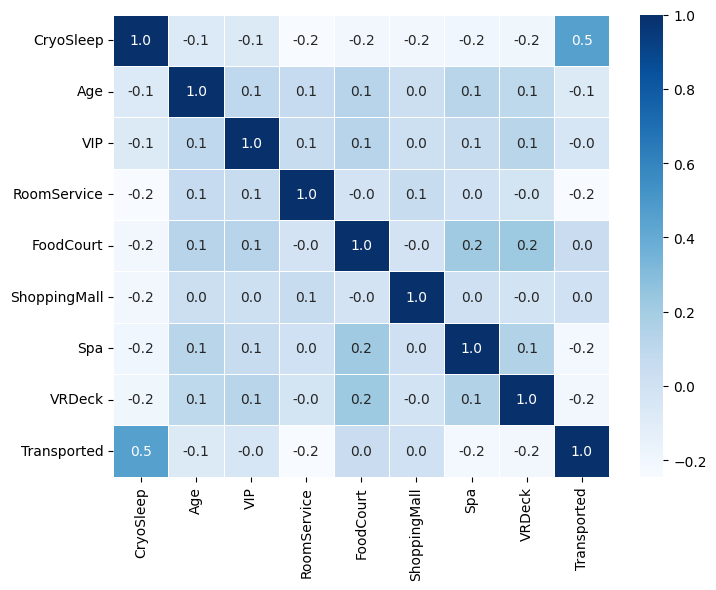

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(train.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

In [ ]:
px.imshow(train.corr())


<ipython-input-82-a40444a4453a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#Encoding  categorical columns using one hot encoding

In [ ]:
#Handling Categorical Columns
train=pd.get_dummies(train,columns=['HomePlanet','Destination','Cabin_A','Cabin_C'],drop_first=True)

In [ ]:
train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Cabin_C_S
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,1,0,0,0,0,0,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1,...,0,1,0,0,0,0,1,0,0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,...,0,1,0,0,0,0,0,0,0,1
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,...,0,1,0,0,0,0,0,0,0,1
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   bool   
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   int64  
 10  Cabin_B                    8693 non-null   object 
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_PSO J318.5-22  8693 non-null   uint8

In [ ]:
y_train=train['Transported']
x_train=train.drop(columns='Transported')

In [ ]:
x_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_B,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Cabin_C_S
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,1,0,0,0,0,0,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,...,0,1,0,0,0,0,1,0,0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,...,0,1,0,0,0,0,0,0,0,1
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,...,0,1,0,0,0,0,0,0,0,1
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,98,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,1499,...,1,0,0,0,0,0,0,1,0,1
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1500,...,0,1,0,0,0,0,0,1,0,1
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,608,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
test['Age']=test['Age'].fillna(test['Age'].mean())
test['RoomService']=test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt']=test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall']=test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa']=test['Spa'].fillna(test['Spa'].mean())
test['VRDeck']=test['VRDeck'].fillna(test['VRDeck'].mean())


In [ ]:
test['Cabin_A']=test['Cabin'].str.split('/').str[0]
test['Cabin_B']=test['Cabin'].str.split('/').str[1]
test['Cabin_C']=test['Cabin'].str.split('/').str[2]

In [ ]:
test.drop(columns='Name',inplace=True)

In [ ]:
#Handling Categorical Columns
test=pd.get_dummies(test,columns=['HomePlanet','Destination','Cabin_A','Cabin_C'],drop_first=True)


In [ ]:
test.drop(columns='Cabin',inplace=True)

In [ ]:
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_B,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Cabin_C_S
0,0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,0,1
1,0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,4,...,0,1,0,0,0,0,1,0,0,1
2,0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,...,0,1,0,1,0,0,0,0,0,1
4,0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0,5,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
x_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_B,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Cabin_C_S
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,1,0,0,0,0,0,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,...,0,1,0,0,0,0,1,0,0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,...,0,1,0,0,0,0,0,0,0,1
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,...,0,1,0,0,0,0,0,0,0,1
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(test)

In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=scaler.get_feature_names_out())

In [ ]:
x_train_scaled

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_B,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Cabin_C_S
0,-1.734411,-0.732770,0.709437,-0.153063,-0.333105,-0.287314,-0.290817,-0.276663,-0.269023,-1.191744,...,-0.317487,0.652521,3.187347,-0.30661,-0.241218,-0.334759,-0.688215,-0.681690,-0.02399,-1.032865
1,-1.734036,-0.732770,-0.336717,-0.153063,-0.168073,-0.281669,-0.248968,0.211505,-0.230194,-1.191744,...,-0.317487,0.652521,-0.313741,-0.30661,-0.241218,-0.334759,1.453035,-0.681690,-0.02399,0.968181
2,-1.733662,-0.732770,2.034566,6.533255,-0.268001,1.955616,-0.290817,5.694289,-0.225782,-1.191744,...,-0.317487,0.652521,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.681690,-0.02399,0.968181
3,-1.733658,-0.732770,0.290975,-0.153063,-0.333105,0.517406,0.330225,2.683471,-0.098708,-1.191744,...,-0.317487,0.652521,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.681690,-0.02399,0.968181
4,-1.733287,-0.732770,-0.894666,-0.153063,0.125652,-0.243409,-0.038048,0.225732,-0.267258,-1.189769,...,-0.317487,0.652521,-0.313741,-0.30661,-0.241218,-0.334759,1.453035,-0.681690,-0.02399,0.968181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.738234,-0.732770,0.848924,6.533255,-0.333105,3.989682,-0.290817,1.184286,-0.203720,-0.998198,...,-0.317487,-1.532519,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.681690,-0.02399,-1.032865
8689,1.738982,1.364685,-0.755179,-0.153063,-0.333105,-0.287314,-0.290817,-0.276663,-0.269023,1.768722,...,3.149739,-1.532519,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,1.466943,-0.02399,0.968181
8690,1.739357,-0.732770,-0.197230,-0.153063,-0.333105,-0.287314,2.842851,-0.275774,-0.269023,1.770697,...,-0.317487,0.652521,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,1.466943,-0.02399,0.968181
8691,1.739731,-0.732770,0.221232,-0.153063,-0.333105,0.370637,-0.290817,0.037223,2.585740,0.009032,...,-0.317487,-1.532519,-0.313741,-0.30661,-0.241218,2.987225,-0.688215,-0.681690,-0.02399,0.968181


In [ ]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=scaler.get_feature_names_out())

In [ ]:
x_test_scaled

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_B,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Cabin_C_S
0,-1.729918,1.364685,-0.127486,-0.153063,-0.333105,-0.287314,-0.290817,-0.276663,-0.269023,-1.185819,...,-0.317487,0.652521,-0.313741,-0.306610,-0.241218,-0.334759,-0.688215,1.466943,-0.02399,0.968181
1,-1.728046,-0.732770,-0.685435,-0.153063,-0.333105,-0.281669,-0.290817,2.233537,-0.269023,-1.183844,...,-0.317487,0.652521,-0.313741,-0.306610,-0.241218,-0.334759,1.453035,-0.681690,-0.02399,0.968181
2,-1.727671,1.364685,0.151488,-0.153063,-0.333105,-0.287314,-0.290817,-0.276663,-0.269023,-1.191744,...,-0.317487,-1.532519,-0.313741,3.261474,-0.241218,-0.334759,-0.688215,-0.681690,-0.02399,0.968181
3,-1.726923,-0.732770,0.639693,-0.153063,-0.333105,3.884937,-0.290817,-0.115719,0.247217,-1.189769,...,-0.317487,0.652521,-0.313741,3.261474,-0.241218,-0.334759,-0.688215,-0.681690,-0.02399,0.968181
4,-1.726174,-0.732770,-0.615692,-0.153063,-0.317964,-0.287314,0.772152,-0.276663,-0.269023,-1.181869,...,-0.317487,0.652521,-0.313741,-0.306610,-0.241218,-0.334759,1.453035,-0.681690,-0.02399,0.968181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.734493,1.364685,0.360719,-0.153063,-0.333105,-0.287314,-0.290817,-0.276663,-0.269023,1.762797,...,-0.317487,0.652521,-0.313741,-0.306610,-0.241218,-0.334759,-0.688215,1.466943,-0.02399,0.968181
4273,1.735613,-0.732770,0.918668,-0.153063,-0.333105,0.243939,-0.262360,-0.267771,-0.141948,-0.875750,...,-0.317487,0.652521,-0.313741,-0.306610,-0.241218,-0.334759,-0.688215,1.466943,-0.02399,-1.032865
4274,1.736362,1.364685,-0.011841,-0.153063,-0.333105,-0.287314,-0.290817,-0.276663,-0.269023,-0.607156,...,-0.317487,-1.532519,-0.313741,-0.306610,4.145623,-0.334759,-0.688215,-0.681690,-0.02399,-1.032865
4275,1.737110,-0.732770,-0.011841,-0.153063,-0.333105,1.393629,-0.290817,-0.276663,0.192505,-0.605181,...,-0.317487,0.652521,-0.313741,-0.306610,4.145623,-0.334759,-0.688215,-0.681690,-0.02399,-1.032865


## Modelling

In [ ]:
from sklearn.svm import SVC, LinearSVC
SVM = SVC(C=0.02, gamma=0.3, kernel='poly')
SVM.fit(x_train_scaled, y_train)
preds_svm = SVM.predict(x_test_scaled)
conf_mat = confusion_matrix(y_test, preds_svm)
print('F1-score% =', f1_score(y_test, preds_svm, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_svm)*100)

F1-score% = 33.545680546923556 | Accuracy% = 50.479307926116434


In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_train =cross_val_score(SVM, x_train_scaled, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_train.mean()*100.0, SVM_hyperd_train.std()*100.0))

Mean Accuracy: 79.363%, Standard Deviation: (1.05%)


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_test =cross_val_score(SVM,  x_test_scaled, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_test.mean()*100.0, SVM_test.std()*100.0))

Mean Accuracy: 99.836%, Standard Deviation: (0.21%)


In [ ]:
#Logistic_Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,roc_curve
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)
print('training accuracy',accuracy_score(y_train,lr.predict(x_train_scaled)))
print('training classification report\n',classification_report(y_train,lr.predict(x_train_scaled)))
#plot_confusion_matrix(lr,x_train_scaled,y_train)

training accuracy 0.7930518808236512
training classification report
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      4315
           1       0.78      0.81      0.80      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693



training accuracy 0.8499942482457149
training classification report
               precision    recall  f1-score   support

       False       0.84      0.87      0.85      4315
        True       0.86      0.83      0.85      4378

    accuracy                           0.85      8693
   macro avg       0.85      0.85      0.85      8693
weighted avg       0.85      0.85      0.85      8693



c:\Users\hossa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



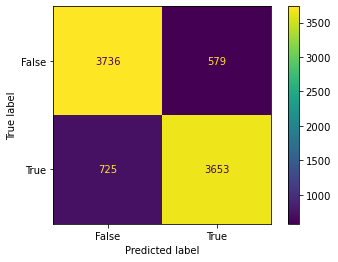

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
print('training accuracy',accuracy_score(y_train,knn.predict(x_train_scaled)))
print('training classification report\n',classification_report(y_train,knn.predict(x_train_scaled)))
plot_confusion_matrix(knn,x_train_scaled,y_train)

training accuracy 0.7168986540894973
training classification report
               precision    recall  f1-score   support

       False       0.86      0.52      0.64      4315
        True       0.66      0.92      0.77      4378

    accuracy                           0.72      8693
   macro avg       0.76      0.72      0.70      8693
weighted avg       0.76      0.72      0.70      8693



c:\Users\hossa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



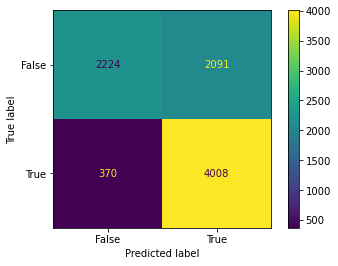

In [ ]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
y_pred_nb = nb.predict(x_test_scaled)
print('training accuracy',accuracy_score(y_train,nb.predict(x_train_scaled)))
print('training classification report\n',classification_report(y_train,nb.predict(x_train_scaled)))
plot_confusion_matrix(nb,x_train_scaled,y_train)


training accuracy 0.9318992292649259
training classification report
               precision    recall  f1-score   support

       False       0.93      0.93      0.93      4315
        True       0.93      0.93      0.93      4378

    accuracy                           0.93      8693
   macro avg       0.93      0.93      0.93      8693
weighted avg       0.93      0.93      0.93      8693



c:\Users\hossa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



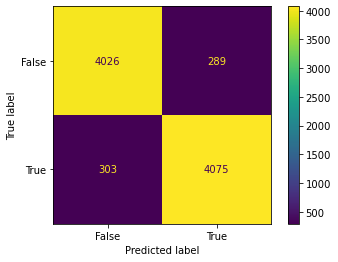

In [ ]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_scaled,y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
print('training accuracy',accuracy_score(y_train,xgb.predict(x_train_scaled)))
print('training classification report\n',classification_report(y_train,xgb.predict(x_train_scaled)))
plot_confusion_matrix(xgb,x_train_scaled,y_train)


In [ ]:
Transported=xgb.predict(x_test_scaled)
Transported=pd.DataFrame(Transported)

In [ ]:
Transported

,0
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,1
4274,1
4275,1


In [ ]:
Final_Data=test.join(Transported)

In [ ]:
Final_Data.rename(columns={0:'Transported'},inplace = True)

In [ ]:
Final_Data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1


In [ ]:
#Mapping_Target
target_mapping_2={1:'True',0:'False'}
Final_Data["Transported"] = Final_Data["Transported"].map(target_mapping_2)

In [ ]:
Final=Final_Data[['PassengerId','Transported']]

In [ ]:
Final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
